#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


# Analysing Data

In [2]:
df=pd.read_csv('Preprocessed Dataset/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,84,51,37,20.879744,82.002744,6.502985,202.935536,rice
1,97,42,40,21.770462,80.319644,7.038096,226.655537,rice
2,82,36,35,23.004459,82.320763,7.840207,263.964248,rice
3,64,56,35,26.491096,80.158363,6.980401,242.864034,rice
4,62,38,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,104,36,34,26.774637,66.413269,6.780064,177.774507,coffee
2196,91,38,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,80,24,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,114,34,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,94,20,28,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.537727,53.241818,48.205455,25.616244,71.481779,6.469480,103.463655
std,38.074046,32.926913,50.546433,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,28.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,36.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,86.250000,69.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].value_counts()

mothbeans      100
cotton         100
maize          100
coconut        100
lentil         100
coffee         100
apple          100
pomegranate    100
mango          100
muskmelon      100
papaya         100
grapes         100
jute           100
pigeonpeas     100
banana         100
rice           100
watermelon     100
kidneybeans    100
blackgram      100
orange         100
chickpea       100
mungbean       100
Name: label, dtype: int64

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
s=df.corr()
s

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237907,-0.157117,0.016788,0.185092,0.103144,0.061036
P,-0.237907,1.000000,0.736500,-0.130471,-0.125085,-0.142017,-0.055964
K,-0.157117,0.736500,1.000000,-0.159065,0.191551,-0.170182,-0.054407
temperature,0.016788,-0.130471,-0.159065,1.000000,0.205320,-0.017795,-0.030084
humidity,0.185092,-0.125085,0.191551,0.205320,1.000000,-0.008483,0.094423
ph,0.103144,-0.142017,-0.170182,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.061036,-0.055964,-0.054407,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

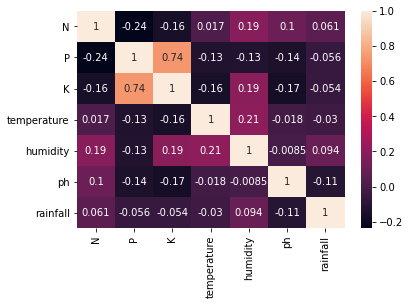

In [13]:
sns.heatmap(s,annot=True)

In [14]:
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']

In [15]:
acc=[]
model=[]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

#  Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DecisionTree=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2)
DecisionTree.fit(X_train,y_train)
predicted=DecisionTree.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Accuracy[Decision Tree]:",x*100)

Accuracy[Decision Tree]: 90.22727272727272


In [19]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      0.88      0.94        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.91      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.80      0.95      0.87        21
       mango       1.00      0.85      0.92        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
score=cross_val_score(DecisionTree,features,target,cv=5)
score

array([0.93409091, 0.89772727, 0.91818182, 0.92727273, 0.93181818])

# Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
Naive_Bayes=GaussianNB()
Naive_Bayes.fit(X_train,y_train)
predicted=Naive_Bayes.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print("Accuracy[Naive Bayes]:",x*100)

Accuracy[Naive Bayes]: 99.0909090909091


In [24]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [25]:
score=cross_val_score(Naive_Bayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99318182, 0.99545455, 0.99090909])

#  Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
predicted=logreg.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Accuracy[Logistic Regression]:",x*100)

Accuracy[Logistic Regression]: 96.36363636363636


In [28]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.78      0.88      0.82        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.86      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       0.91      0.95      0.93        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       0.95    

In [29]:
score=cross_val_score(logreg,features,target,cv=5)
score

array([0.96136364, 0.975     , 0.96136364, 0.95681818, 0.95454545])

#  Support Vector Machine

In [30]:
from sklearn.svm import SVC

In [31]:
SVM=SVC(gamma='auto')
SVM.fit(X_train,y_train)
predicted=SVM.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('SVM')
print('Accuracy[SVM]:',x*100)

Accuracy[SVM]: 14.772727272727273


In [32]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      0.54      0.70        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.38      0.55        16
    chickpea       1.00      0.19      0.32        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.10      0.18        20
      grapes       1.00      0.06      0.11        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.35      0.52        23
      orange       1.00      0.03      0.07        29
      papaya       0.00    

In [33]:
score=cross_val_score(SVM,features,target,cv=5)
score

array([0.26136364, 0.24772727, 0.28409091, 0.26590909, 0.24545455])

#  Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF=RandomForestClassifier(n_estimators=29,criterion='entropy',random_state=0)
RF.fit(X_train,y_train)
predicted=RF.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append("Random Forest")
print("Accuracy[Random Forest]:",x*100)

Accuracy[Random Forest]: 99.0909090909091


In [36]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [37]:
score=cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99545455, 0.99545455, 0.98863636])

# XG Boost 

In [38]:
import xgboost as xgb

In [39]:
xb=xgb.XGBClassifier(eval_metric='mlogloss')
xb.fit(X_train,y_train)
predicted=xb.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('Accuracy[XG Boost]:',x*100)

Accuracy[XG Boost]: 99.0909090909091


In [40]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [41]:
score=cross_val_score(xb,features,target,cv=5)
score

array([0.98409091, 0.99318182, 0.99545455, 0.98863636, 0.98636364])

#  Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithms'>

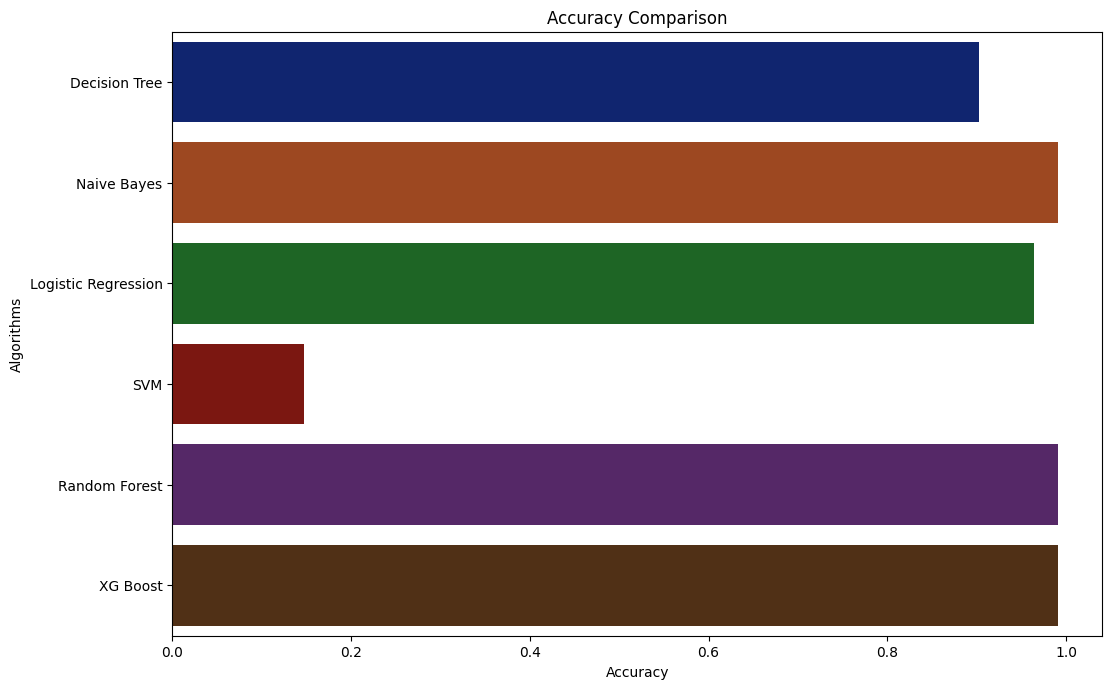

In [42]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

In [43]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,0.902273
1,Naive Bayes,0.990909
2,Logistic Regression,0.963636
3,SVM,0.147727
4,Random Forest,0.990909
5,XG Boost,0.990909


#  Testing Own Data

In [44]:
data=np.array([[90,42,43,23.60,60.3,6.7,140.921]])
prediction=RF.predict(data)
print(prediction)

['coffee']


In [45]:
data=np.array([[90,42,43,20.87,82,6.50,202.9]])
prediction=RF.predict(data)
print(prediction)

['rice']


In [46]:
data=np.array([[107,34,32,26.77,66.41,6.7,177.7]])
prediction=RF.predict(data)
print(prediction)

['coffee']


#  Saving a Random Forest Model

In [47]:
import pickle
file_name='Model/crop_recommender.pkl'
pkl=open(file_name,'wb')
pickle.dump(RF,pkl)
pkl.close()